# HANDLING MISSING VALUES

Why there are Missing values??

If we take depression survey then the atmost reasons for the missing values follows:

1. They hesitate to put down the information
2. Survey informations are not that valid
3. Men may not be interested in mentioning their salary
4. Women may not be interested in mentioning their age
5. People may have died----NAN


# What are the different types of Missing Data?




#  1. MISSING COMPLETELY AT RANDOM (MCAR)

    A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

Simply it can be defined as the data which is missing should not have any relationship with other features.

Another example is when we take a random sample of a population, where each member has the same chance of being included in the sample. The (unobserved) data of members in the population that were not included in the sample are MCAR. While convenient, MCAR is often unrealistic for the data at hand.

In [1]:
#Disable pandas warnings
import pandas as pd
pd.options.mode.chained_assignment = None

import warnings
warnings.filterwarnings('ignore')



In [17]:
data=pd.read_csv("D:\\titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here in the dataset there are features which contains null values.

Null values occured because the person may died so that there is no entry.

Age and cabin is related because before the accident the person of the particular age accomodated in the respective cabin.

Since Age and Cabin is related it is not MCAR.

But Age,Cabin is not related to embarked feature. so embarked is considered as MCAR.

In [19]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# 2.MISSING COMPLETELY NOT AT RANDOM (MNAR):SYSTEMATIC MISSING VALUES

It is the vice versa of MCAR.The data that is missing should have absolute relationship with other data in the set

In [20]:
import numpy as np
data['cabin_null']=np.where(data['Cabin'].isnull(),1,0)
data['cabin_null'].mean()

0.7710437710437711

0.77 is the mean of occurance of null values in the cabin feature.

so it means there is 77% of occurance of null values in the cabin feature

In [40]:
data.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

So,the mean values of people survived and people died is calculated with respect to Survived feature

# 3.MISSING AT RANDOM (MAR)

If the probability of being missing is the same only within groups defined by the observed data, then the data are missing at random (MAR). MAR is a much broader class than MCAR. For example, when placed on a soft surface, a weighing scale may produce more missing values than when placed on a hard surface. Such data are thus not MCAR. If, however, we know surface type and if we can assume MCAR within the type of surface, then the data are MAR. Another example of MAR is when we take a sample from a population, where the probability to be included depends on some known property. MAR is more general and more realistic than MCAR. Modern missing data methods generally start from the MAR assumption.

When we say data are missing at random, we mean that missing data on a partly missing variable (Y) is related to some other completely observed variables(X) in the analysis model but not to the values of Y itself.

A pictorial view of MAR as below where missingness relates to dataset variable X but not with Y. It can have other relationships (Z). It is not specifically related to the missing information. For example, if a child does not attend an examination because the child is ill, this might be predictable from other data about the child’s health, but it would not be related to what we would have examined had the child not been ill. Some may think that MAR does not present a problem. However, MAR does not mean that the missing data can be ignored.

In [ ]:
##there is no MAR data missing in the titanic dataset

## There are two types of imputation of null values:
      1.Univariate imputation
             It means if you use the same column of the missing value for imputation.for example imputing mean median etc.
       2.Multivariate imputation
             It means if you use other features to impute the missing value in the feature. for example (KNN imputation)

# TECHNIQUES TO HANDLE MISSING VALUES

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation


# 1. MEAN / MEDIAN / MODE REPLACEMENT

Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

Imputation of mean may lead to cause outliers in the dataset in some cases like data missing in Age column.

In [2]:
import pandas as pd
data=pd.read_csv("D:\\titanic.csv")
data['Age'].mean()

29.69911764705882

In [3]:
data.shape

(891, 12)

In [4]:
data['Age'].sum()

21205.17

In [5]:
21205.17/891

23.79929292929293

In [6]:
data['Age'].isnull().sum()

177

In [7]:
891-177

714

In [8]:
21205.17/714

29.69911764705882

If the age column as NaN values...we will fill the NaN values with mean median or mode.....if we calculate mean it wont calculate total records..it will count upto not null values for average

In [13]:
data['age_median']=data['Age'].fillna(data.Age.median())

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [19]:
print(data['Age'].std())  ##Standarad deviation
print(data['age_median'].std())

14.526497332334044
13.019696550973194


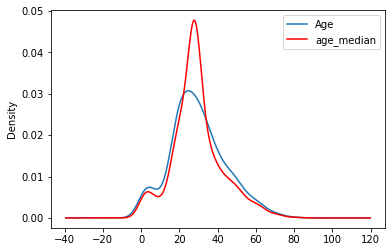

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', ax=ax)
data.age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# 2.RANDOM SAMPLE IMPUTATION 

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? 
It assumes that the data are missing completely at random(MCAR)

In [6]:
data1=pd.read_csv("D:\\titanic.csv",usecols=['Age','Fare','Survived'])
data1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
data1['Age'].isnull().sum()

177

In [8]:
data1['Age'].sample()

876    20.0
Name: Age, dtype: float64

The above statement will produce a sample data from the feature.

Every time we execute the value will change.

Since we have 177 null values in the age feature..We want to impute 177 random values to the feature.

In [9]:
data1['Age'].dropna().sample(data1['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

so in the above cell we have generated 177 random sample values for 177 null values

In [10]:
def imputation(data,var,median):
    data1['age_median']=data1[var].fillna(median)
    data1['age_random']=data1[var]
    random=data1['Age'].dropna().sample(data['Age'].isnull().sum(),random_state=0)
    random.index=data1[data1[var].isnull()].index
    data1.loc[data1[var].isnull(),'age_random']=random
median=data1.Age.median()
imputation(data1,'Age',median)

In [11]:
data1.head()

,Survived,Age,Fare,age_median,age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


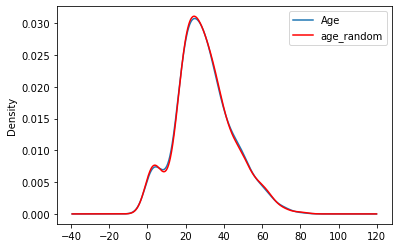

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
data1['Age'].plot(kind='kde', ax=ax)
data1.age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Here the distortion of variance is very less compared to median imputation.but this method wont work every time.

# 3. CAPTURING NAN VALUES WITH NEW FEATURE

This method works when the data is not missing at random (MNAR)

The main aim of this method is it captures the importance of the NAN values by creating a new feature

In [3]:
import numpy as np
data5=pd.read_csv("D:\\titanic.csv",usecols=['Survived','Age','Fare'])
data5.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
data5['age_capture']=np.where(data5['Age'].isnull(),1,0)


In [8]:
data5.Age.fillna(data5.Age.median()).head(7)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
Name: Age, dtype: float64

In [9]:
data5.head()

,Survived,Age,Fare,age_capture
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


There may be a question like what is the use of creating extra feature for nan values and even if it created we are filling the median values in the actual age column...so what is the use?

The answer is during the training of the model....the model mey miss its accuracy due to ignorance of nan values

So if we create an extra feature for nan values......the model will understand the significance of the nan values from the new feature.

So the importance of the Nan values is being considered.

Disadvantage about this method is it creates extra features which may lead to curse of dimensionality

# 4.END OF DISTRIBUTION IMPUTATION

This method is used to data missing not at random (MNAR).

This method is about imputing the extreme values in the distribution

In [5]:
data6=pd.read_csv("D:\\titanic.csv",usecols=['Survived','Age','Fare'])
data6.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

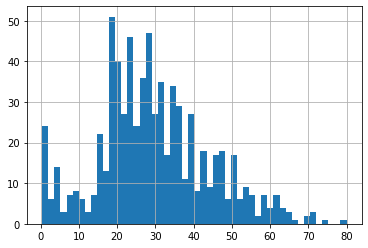

In [6]:
data6['Age'].hist(bins=50)

The above shown distribution is with null values and for end of distribution imputing we are going to take the extreme values.That is 3 rd standard deviation

In [7]:
extreme=data6.Age.mean()+3*data6.Age.std()
extreme

73.27860964406095

So the extreme value which we gonna impute is 73.27 which lies between 70-80 in the distribution

<AxesSubplot:xlabel='Age'>

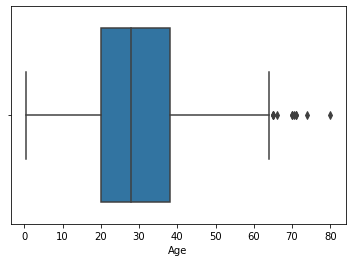

In [8]:
import seaborn as sns
sns.boxplot('Age',data=data6)

So in above boxplot for Age feature with nan values...we can able to see the outliers.

In [12]:
def end_impute(data,variable,median,extreme):
    data6['age_end']=data6[variable].fillna(extreme)
    data6['Age'].fillna(median,inplace=True)
median=data6.Age.median()    
end_impute(data6,'Age',median,extreme) 
data6.head(7)

,Survived,Age,Fare,age_end
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000


<AxesSubplot:>

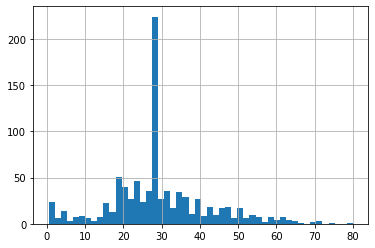

In [17]:
data6['Age'].hist(bins=50)

The above histogram has a steep line which shows huge distortion of variance in the distribution

<AxesSubplot:>

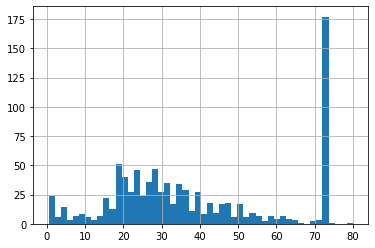

In [18]:
data6['age_end'].hist(bins=50)

In this plot also but the range is different so to check which is best one we want to go with box plot.

<AxesSubplot:xlabel='age_end'>

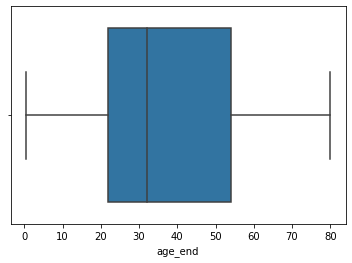

In [16]:
import seaborn as sns
sns.boxplot('age_end',data=data6)

So in the above boxplot the outliers has been removed

# 5.ARBITRARY VALUE IMPUTATION

The technique was derived from kaggle competition

this technique is about imputing random or abitrary value to the nan values......arbitrary value means a value without a reason.....or else imputing on own.

This technique is not used widely because it has a problem that which value we will impute

In [12]:
data8=pd.read_csv("D:\\titanic.csv",usecols=['Survived','Age','Fare'])
data8.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
def impute_arb(data,var):
    data8['age_hundred']=data8[var].fillna(100)
    data8['age_zero']=data8[var].fillna(0)
impute_arb(data8,'Age')    

In [14]:
data8.head(7)

,Survived,Age,Fare,age_hundred,age_zero
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,100.0,0.0
6,0,54.0,51.8625,54.0,54.0


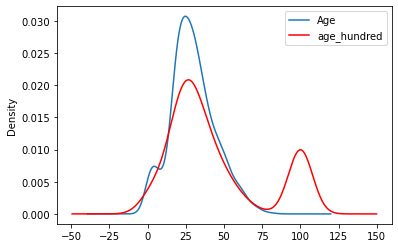

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
data8['Age'].plot(kind='kde', ax=ax)
data8.age_hundred.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

we can able to see lot of distortion of variance so this method not widely used since we dont know which value exactly to choose

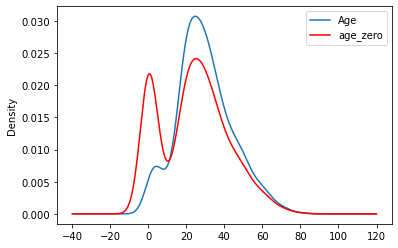

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
data8['Age'].plot(kind='kde', ax=ax)
data8.age_zero.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

same reason.

# HANDLING MISSING VARIABLES FOR CATEGORICAL FEATURES

## METHODS:
        1.Delete the rows
        2.replace with most frequent categories
        3.Apply any classifier algorithm to predict (ex: KNN)
        4.Use any unsupervised ML technique (ex: Clustering)

# 6.FREQUENT CATEGORIES IMPUTATION

In [47]:
datac=pd.read_csv("D:\\datasets\\amazon_baby.csv")
datac.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [48]:
datac.shape

(183531, 3)

In [49]:
datac.isnull().sum()

name      318
review    829
rating      0
dtype: int64

In [50]:
datac.isnull().mean()

name      0.001733
review    0.004517
rating    0.000000
dtype: float64

Since the null value percentage is very less we should capture the null values with new feature and replace it with most frequent value

In [51]:
datac.columns

Index(['name', 'review', 'rating'], dtype='object')

In [52]:
import numpy as np
def impute_cat(datac,i):
    datac[i+'_cat']=np.where(datac[i].isnull(),1,0)
    datac[i]=datac[i].fillna(datac[i].mode()[0])
for i in ['name','review']:
    impute_cat(datac,i)

In [53]:
datac.head()

,name,review,rating,name_cat,review_cat
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,0,0
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,0,0
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,0,0
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,0,0
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,0,0


In [54]:
datac.isnull().sum()

name          0
review        0
rating        0
name_cat      0
review_cat    0
dtype: int64

So there is no null values.

If the null value percentage is high then replacing with most frequent category is not good because it will make the dataset biased.

so if the null value percentage is high we shoulf replace the null value with the word 'missing' or any other.